In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy import table
from scipy.optimize import curve_fit
from fonctions_maison import *
from scipy.constants import h, c, m_e, e
from scipy.signal import find_peaks, find_peaks_cwt
from lmfit.models import SkewedGaussianModel
e_0 = 8.85e-12 # Epsilon 0


On importe les données

In [49]:
#Doublet de sodium
lamda, counts_doublet = np.loadtxt("Données/doublet_sodium.txt", unpack = True, skiprows = 17)

#Échantillon d'or
lamda, counts_or_brute = np.loadtxt("Données/echantillon_or.txt", unpack = True, skiprows = 17)
lamda, counts_or_calib = np.loadtxt("Données/sans_echantillon_or.txt", unpack = True, skiprows = 17)

# GaSe
lamda, counts_GaSe_brute = np.loadtxt("Données/echantillon_GaSe.txt", unpack = True, skiprows = 17)
lamda, counts_GaSe_calib = np.loadtxt("Données/sans_echantillon_GaSe.txt", unpack = True, skiprows = 17)

# Épaisseur vs échantillon
lamda, counts_un_0 = np.loadtxt("Données/un0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_0 = np.loadtxt("Données/vitre0.txt", unpack = True, skiprows = 17)
lamda, counts_trois_0 = np.loadtxt("Données/trois0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_0 = np.loadtxt("Données/vitre0.txt", unpack = True, skiprows = 17)

#Épaisseur vs angle
lamda, counts_deux_45 = np.loadtxt("Données/angles/deux45_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_48 = np.loadtxt("Données/angles/deux48_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_52 = np.loadtxt("Données/angles/deux52_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_56 = np.loadtxt("Données/angles/deux56_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_58 = np.loadtxt("Données/angles/deux58_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_60 = np.loadtxt("Données/angles/deux60_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_62 = np.loadtxt("Données/angles/deux62_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_64 = np.loadtxt("Données/angles/deux64_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_66 = np.loadtxt("Données/angles/deux66_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_68 = np.loadtxt("Données/angles/deux68_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_70 = np.loadtxt("Données/angles/deux70_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_72 = np.loadtxt("Données/angles/deux72_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_74 = np.loadtxt("Données/angles/deux74_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_76 = np.loadtxt("Données/angles/deux76_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_78 = np.loadtxt("Données/angles/deux78_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_80 = np.loadtxt("Données/angles/deux80_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_82 = np.loadtxt("Données/angles/deux82_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_84 = np.loadtxt("Données/angles/deux84_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_86 = np.loadtxt("Données/angles/deux86_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_88 = np.loadtxt("Données/angles/deux88_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_90 = np.loadtxt("Données/angles/deux90_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_92 = np.loadtxt("Données/angles/deux92_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_94 = np.loadtxt("Données/angles/deux94_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_98 = np.loadtxt("Données/angles/deux98_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_103 = np.loadtxt("Données/angles/deux103_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_107 = np.loadtxt("Données/angles/deux107_0.txt", unpack = True, skiprows = 17)

lamda_, counts_vitre_45 = np.loadtxt("Données/angles/vitre45_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_48 = np.loadtxt("Données/angles/vitre48_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_52 = np.loadtxt("Données/angles/vitre52_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_56 = np.loadtxt("Données/angles/vitre56_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_58 = np.loadtxt("Données/angles/vitre58_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_60 = np.loadtxt("Données/angles/vitre60_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_62 = np.loadtxt("Données/angles/vitre62_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_64 = np.loadtxt("Données/angles/vitre64_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_66 = np.loadtxt("Données/angles/vitre66_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_68 = np.loadtxt("Données/angles/vitre68_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_70 = np.loadtxt("Données/angles/vitre70_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_72 = np.loadtxt("Données/angles/vitre72_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_74 = np.loadtxt("Données/angles/vitre74_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_76 = np.loadtxt("Données/angles/vitre76_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_78 = np.loadtxt("Données/angles/vitre78_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_80 = np.loadtxt("Données/angles/vitre80_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_82 = np.loadtxt("Données/angles/vitre82_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_84 = np.loadtxt("Données/angles/vitre84_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_86 = np.loadtxt("Données/angles/vitre86_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_88 = np.loadtxt("Données/angles/vitre88_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_90 = np.loadtxt("Données/angles/vitre90_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_92 = np.loadtxt("Données/angles/vitre92_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_94 = np.loadtxt("Données/angles/vitre94_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_98 = np.loadtxt("Données/angles/vitre98_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_103 = np.loadtxt("Données/angles/vitre103_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_107 = np.loadtxt("Données/angles/vitre107_0.txt", unpack = True, skiprows = 17)


#Bonus
lamda, counts_feuille_verte = np.loadtxt("Données/feuille_vieux_arbre.txt", unpack = True, skiprows = 17)
lamda, counts_feuille_brune = np.loadtxt("Données/feuille_morte_vieux_arbre.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_feuille = np.loadtxt("Données/vitre_feuille_vieux_arbre.txt", unpack = True, skiprows = 17)



On fit le doublet de sodium pour déterminer la résolution du spectrographe

H = 0.05407277549609962, A = 0.9527404236212563, x0 = 588.4706972337457, sigma = 0.684572458457498


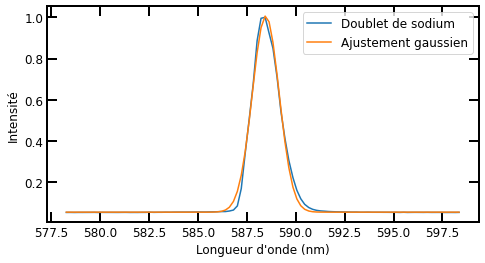

In [104]:
lamda_gauss, counts_doublet_gauss = lamda[1100:1200], counts_doublet[1100:1200] #On isole la gaussienne
counts_doublet_gauss /= np.max(counts_doublet_gauss) #Normalisation

#Faison un fit gaussien sur la courbe
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

p0 = [2000, 6e4, 587, 3] #Initial guess
p_opt, p_cov = curve_fit(gauss, lamda_gauss, counts_doublet_gauss, p0)
print("H = {}, A = {}, x0 = {}, sigma = {}".format(p_opt[0], p_opt[1], p_opt[2], p_opt[3]))

H, A, x0, sigma = p_opt[0], p_opt[1], p_opt[2], p_opt[3]

y_fit = gauss(lamda_gauss,H, A, x0, sigma)

beau_graphique()

plt.plot(lamda_gauss, counts_doublet_gauss, label = "Doublet de sodium")
plt.plot(lamda_gauss, y_fit, label = "Ajustement gaussien")
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Intensité")
plt.legend()
plt.show()

Détermination de la résolution pour l'incertitude

In [4]:
fwhm = 2.35*sigma #Largeur à mi-hauteur de la gaussienne

res = x0/fwhm
print("Résolution du spectromètre: {}".format(res)) #Résolution du spectromètre

def erreur_lambda(lamda): 
    
    inc = lamda/res

    return inc



Résolution du spectromètre: 365.79482501661977


gap d'énergie/phonon

Comparaison entre spectres GaSe brute et spectre de calibration


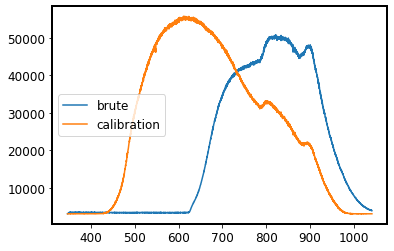

In [5]:
with open("Données/echantillon_GaSe.txt") as GaSe_brute:
    int_time_brute = float(list(GaSe_brute)[8].split(":")[1].split("(")[0])
    
with open("Données/sans_echantillon_GaSe.txt") as GaSe_calib:
    int_time_calib = float(list(GaSe_calib)[8].split(":")[1].split("(")[0])
    
# Normalisons le spectre du GaSe   
counts_GaSe_norm = (counts_GaSe_brute/int_time_brute)/(counts_GaSe_calib/int_time_calib)

print("Comparaison entre spectres GaSe brute et spectre de calibration")
plt.plot(lamda, counts_GaSe_brute, label = "brute")
plt.plot(lamda, counts_GaSe_calib, label = "calibration")
plt.legend()
plt.show()



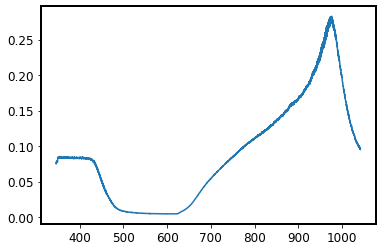

Voici le spectre d'absorption


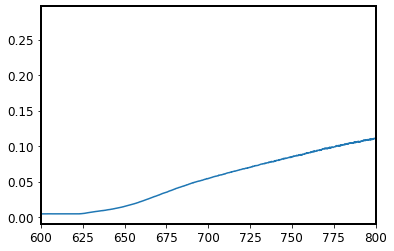

Voici la zone d'importance pour trouver l'énergie de gap et de phonon


In [6]:
plt.plot(lamda,counts_GaSe_norm, label = "normalisé")
plt.show()

print("Voici le spectre d'absorption")

plt.plot(lamda,counts_GaSe_norm, label = "normalisé")
plt.xlim([600,800])
plt.show()

print("Voici la zone d'importance pour trouver l'énergie de gap et de phonon")

Fréquence de plasma de l'or

Comparaison entre spectres d'or brute et spectre de calibration


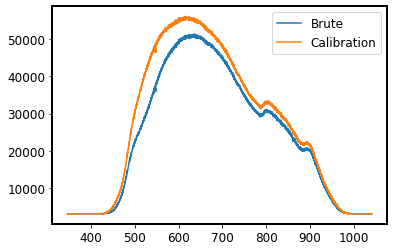

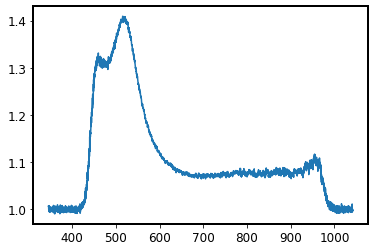

Est-ce que le pic dans le graphique correspond à la fréquence de plasma? 


In [7]:
print("Comparaison entre spectres d'or brute et spectre de calibration")

plt.plot(lamda, counts_or_brute, label = "Brute")
plt.plot(lamda, counts_or_calib, label = "Calibration")
plt.legend()
plt.show()

plt.plot(lamda, counts_or_calib/counts_or_brute)
plt.show()

print("Est-ce que le pic dans le graphique correspond à la fréquence de plasma? ")

Fit gaussien du pic d'absorption de l'or

H = 0.7927423275418766 +/- 0.0004893558649937835, A = 0.2021652727715533 +/- 0.0004673051278229685, x0 = 516.6404145601796 +/- 0.06628348453193819, sigma = 31.08547726788496 +/- 0.11776752541854499


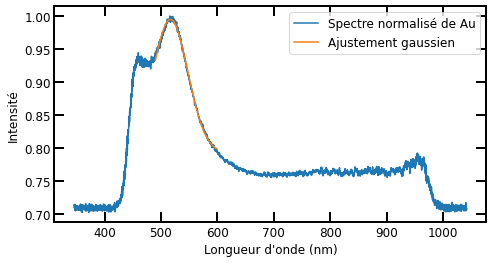

La fréquence plasma de l'or est de 516.6404145601796 +- 1.4123775931950546 nm


In [108]:
counts_or_norm = counts_or_calib/counts_or_brute
counts_or_norm /= np.max(counts_or_norm)

p0 = [1.2, 1.4, 520, 3] #Initial guess
idebut, ifin = find_nearest(lamda,490), find_nearest(lamda,600)
gauss_or, p_opt, p_err = fit_gaussien(lamda[idebut:ifin], counts_or_norm[idebut:ifin], p0 = p0)

# #Plotting
beau_graphique()

plt.plot(lamda, counts_or_norm, label = "Spectre normalisé de Au")
plt.plot(lamda[idebut:ifin], gauss_or, label = "Ajustement gaussien")
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Intensité")
plt.legend()
plt.show()
inc_lamda = erreur_lambda(p_opt[2])
print("La fréquence plasma de l'or est de {} +- {} nm".format(p_opt[2], inc_lamda))

Déterminons la densité électronique de l'or 
$\omega_{pe} = \sqrt{\frac{n_e e^2}{m_e \epsilon_0}}$ 

On a $f = \frac{c}{\lambda}$ et $\omega = 2 \pi f$

Donc, $\omega_{pe} = \frac{2 \pi c }{\lambda}$

Isolons $n_e$:
$$\begin{align}
&\frac{2 \pi c }{\lambda} = \sqrt{\frac{n_e e^2}{m_e \epsilon_0}} \\
&(\frac{2 \pi c }{\lambda})^2 = \frac{n_e e^2}{m_e \epsilon_0} \\
&n_e = (\frac{2 \pi c }{\lambda})^2 \frac{m_e \epsilon_0}{e^2}  
\end{align}$$


In [110]:
onde_plasma = p_opt[2]*10e-9 #en m
n_e  = ((2*np.pi*c/onde_plasma)**2)*(m_e*e_0/e**2)
inc_n_e = (8*np.pi**2*c**2/onde_plasma**3)*(m_e*e_0/e**2)*inc_lamda*(1e-9)
print("La densité électronique de l'échantillon d'or est de: {} +/- {}".format(n_e,inc_n_e))

La densité électronique de l'échantillon d'or est de: 4.174801867898045e+25 +/- 2.28259208845197e+22


Régression linéaire sur le spectre du GaSe 

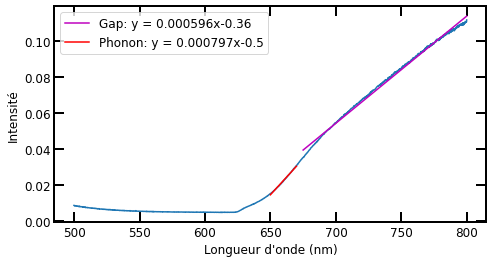

In [119]:
i_gap_debut, i_gap_fin = find_nearest(lamda, 675), find_nearest(lamda, 800) 
i_phonon_debut, i_phonon_fin = find_nearest(lamda, 650), find_nearest(lamda, 670) 
i_plateau_debut, i_plateau_fin = find_nearest(lamda, 600), find_nearest(lamda, 620)
i_plot_debut, i_plot_fin = find_nearest(lamda,500), find_nearest(lamda,800)

x_gap, y_gap = lamda[i_gap_debut:i_gap_fin], counts_GaSe_norm[i_gap_debut:i_gap_fin]
x_phonon, y_phonon = lamda[i_phonon_debut:i_phonon_fin], counts_GaSe_norm[i_phonon_debut:i_phonon_fin]
x_plateau, y_plateau = lamda[i_plateau_debut:i_plateau_fin], counts_GaSe_norm[i_plateau_debut:i_plateau_fin]
x_plot, y_plot = lamda[i_plot_debut:i_plot_fin], counts_GaSe_norm[i_plot_debut:i_plot_fin]

y_fit_gap, popt_gap, perr_gap = reg_lin(x_gap,y_gap)
y_fit_phonon, popt_phonon, perr_phonon = reg_lin(x_phonon,y_phonon)
y_fit_plateau, popt_plateau, perr_plateau = reg_lin(x_plateau, y_plateau)

#Plotting
beau_graphique()

plt.plot(x_plot,y_plot)
plt.plot(x_gap,y_fit_gap,"m", label = "Gap: y = {}x{}".format(popt_gap[0].round(6),popt_gap[1].round(2)))
plt.plot(x_phonon,y_fit_phonon,"r", label = "Phonon: y = {}x{}".format(popt_phonon[0].round(6),popt_phonon[1].round(2)))

plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Intensité")
plt.legend()
plt.show()



In [155]:
#Point d'interception entre gap & plateau
lamda_gap = (popt_plateau[1]-popt_gap[1])/(popt_gap[0]-popt_plateau[0])
lamda_phonon = (popt_plateau[1]-popt_phonon[1])/(popt_phonon[0]-popt_plateau[0])

#lamda_gap = -popt_gap[0]/popt_gap[1] #Abscisses à l'origine
#lamda_phonon = -popt_phonon[0]/popt_phonon[1]

E_gap = h*c/(lamda_gap*1e-9)
E_phonon = ( h*c/(lamda_phonon*1e-9) - E_gap )

print("L'énergie de gap est {} eV et l'énergie des phonons est {} eV".format(E_gap/1.602e-19, E_phonon/1.602e-19))
print((h*c/(lamda_phonon*1e-9))/1.602e-19)

L'énergie de gap est 2.0101960738369926 eV et l'énergie des phonons est -0.06569098333978164 eV
1.9445050904972108


Couche TiO2/Verre

In [152]:
"""#Il faut estimer l'incertitude de l'intensité de la lumière capté par le spectromètre.
i_incert_debut, i_incert_fin = find_nearest(lamda_un_0, 350), find_nearest(lamda_un_0, 370)
x_incert, y_incert = lamda_un_0[i_incert_debut:i_incert_fin], counts_un_0[i_incert_debut:i_incert_fin]
y_fit_incert, popt_incert, perr_incert = reg_lin(x_incert, y_incert)

ysig = np.sum( (counts_un_0[i_incert_debut:i_incert_fin]-y_fit_incert)**2 )/(len(y_fit_incert)-1)  #Estimation de l'incertitude
#print(ysig)
"""
def plot_epaisseur(angle, counts, counts_vitre):

    épaisseur = np.linspace(100,460,1000) #Épaisseur de la couche mince; Pramètre à optimiser; Vérifier que ce sont les bonnes épaisseurs
    theta_0_deg = angle - 76 #Angle en degré
    theta_0 = theta_0_deg*(np.pi/180) #Angle en radian
    
    counts_norm = counts/counts_vitre
    counts_norm /= np.max(counts_norm) #Normalisation
    lamda_500 = lamda_[find_nearest(lamda_,500):find_nearest(lamda_,1000)]
    counts_500 = counts_norm[find_nearest(lamda_,500):find_nearest(lamda_,1000)]
   
    
    peaks_exp = find_peaks_cwt(counts_500,50)
    dist_peak_array = []
    
        
    for d in épaisseur:
        lamda_array = np.linspace(300,1200,1000) 

        T_array = []

        #beau_graphique() #On initialise la figure

        for lamda_it in lamda_array:
            n1 = 1 #n i
            n2 = 2 #n i+1
            n_air = 1 + 0.05792105/(238.0185-(lamda_it*1e-3)**(-2)) + 0.00167917/(57.362-(lamda_it*1e-3)**(-2)) #lamda en micromètre
            n_B270 = np.sqrt(1.676*lamda_it**2/(lamda_it**2-99.19**2) + 0.3728*lamda_it**2/(lamda_it**2-6.359**2) + 0.2172*lamda_it**2/(lamda_it**2-6.436**2)) #lamda en nm
            n_TiO2 = np.sqrt(5.913 + 0.2441/((lamda_it*1e-3)**2-0.0803)) #lamda en micromètre

            #snell-descartes
            theta_1 = np.arcsin(n_air*np.sin(theta_0)/n_TiO2)
            theta_2 = np.arcsin(n_TiO2*np.sin(theta_1)/n_B270)

            
            delta = 4*np.pi*d*n_TiO2*np.cos(theta_1)/(lamda_it) #vérifier les unités!!!!!!!!

            #On peut prendre les équations 'p' ou 's' sans perte de généralité. Donc voici les équations 'p'.
            #Pour le milieu 0, n1=n_air, n2=n_TiO2.
            n1=n_air
            n2=n_TiO2
            theta1 = theta_0 #Angle Entrant
            theta2 = theta_1 #Angle Sortant
            r = (n2*np.cos(theta1)-n1*np.cos(theta2))/(n2*np.cos(theta1)+n1*np.cos(theta2)) #(2,3)
            t = (2*n1*np.cos(theta1))/(n2*np.cos(theta1)+n1*np.cos(theta2)) #(2.3)

            I_0 = (np.cos(theta2)/np.cos(theta1)) * np.array([[1/t, r/t], [r/t, 1/t]]) #(2.5)

            #Pour le milieu 1, n1=n_TiO2, n2=n_B270
            n1=n_TiO2
            n2=n_B270
            theta1 = theta_1 #Entrant
            theta2 = theta_2 #Sortant
            r = (n2*np.cos(theta1)-n1*np.cos(theta2))/(n2*np.cos(theta1)+n1*np.cos(theta2)) #(2,3)
            t = (2*n1*np.cos(theta1))/(n2*np.cos(theta1)+n1*np.cos(theta2)) #(2.3)

            T_1 = np.array([[np.exp(-1.j*delta), 0], [0, np.exp(1.j*delta)]]) #(2.7)
            I_1 = (np.cos(theta2)/np.cos(theta1)) * np.array([[1/t, r/t], [r/t, 1/t]]) #(2.5)
            
            E_1 = np.array([1,0])

            #print(np.shape(T_1))
            #print("I_0= \n", I_0)
            #print("I_1= \n", I_1)

            M = np.dot(np.dot(I_0,T_1),I_1)
            E_0 = np.dot(M,E_1) #(2.8)
                
            t = 1/E_0[0] #(2.9)
            T = n_B270*np.cos(theta_2)*(t*np.conj(t))/(n_air*np.cos(theta_0)) #(2.10)
            T=np.real(T)
            T_array.append(T)
        
        #plt.figure(10, figsize=(6,3), dpi=150)
        #plt.xlabel("Longueur d'onde (nm)")
        #plt.ylabel("Transmittance")
        
        #print("d = ",d)    
        lamda_array_500 = lamda_array[find_nearest(lamda_array,500):find_nearest(lamda_array,1000)]
        T_array_500 = T_array[find_nearest(lamda_array,500):find_nearest(lamda_array,1000)]
        #plt.plot(lamda_array_500,T_array_500, label=d)
        
        peaks_th = find_peaks(T_array_500)
        
        pic_th = lamda_array_500[peaks_th[0]]

        #print(pic_th)
        pic_exp = lamda_500[peaks_exp]
        
        i_fin = -np.abs(len(pic_th)-len(pic_exp))
        #print(i_fin)
        pic_exp = pic_exp[:i_fin]
        #print(pic_exp)
        
        dist_pic = np.mean(np.abs(pic_th - pic_exp))
        dist_peak_array.append(dist_pic)
        #print(dist_pic)
    
        #print(lamda_array_500[peaks_th[0][3]])
        #print(pic_th[3])
        #plt.axvline(lamda_array_500[find_nearest(lamda_array_500,pic_th[3])],0.0,1.0)
        #plt.axvline(lamda_500[find_nearest(lamda_500,pic_exp[-1])],0.0,1.0)
        
        #plt.xlabel("Longueur d'onde (nm)")
        #plt.ylabel("Transmittance")
        #plt.show()
        """
        #print("Expérimental:")
        counts_deux_66_norm = counts_deux_66/counts_vitre_66
        counts_deux_66_norm /= np.max(counts_deux_66_norm) #Normalisation
        
        plt.plot(lamda_,counts_deux_66_norm)
        plt.xlabel("Longueur d'onde (nm)")
        plt.ylabel("Transmittance")
        plt.show()"""

    #Plotting des valeurs expérimentales
    #plt.figure(10, figsize=(6,3), dpi=150)
        
    # counts_norm = counts/counts_vitre
    # counts_norm /= np.max(counts_norm) #Normalisation
    # lamda_500 = lamda_[find_nearest(lamda_,500):find_nearest(lamda_,1000)]
    # counts_500 = counts_norm[find_nearest(lamda_,500):find_nearest(lamda_,1000)]
    
    #plt.plot(lamda_500,counts_500-0.03, label="experimental")
    #plt.xlim([500,1000])
    #print("angle = ",angle)

    #plt.legend()    
    #plt.show()
    
    #d_opt = input("Meilleur épaisseur pour angle est:")
    #peaks_exp = find_peaks(counts_norm)
    
    i_opt, = np.where(dist_peak_array == np.min(dist_peak_array))
   # print(i_opt)
    
    
    return épaisseur[i_opt[0]]




Analyse des différentes couches minces

In [153]:
d_1 = plot_epaisseur(76,counts_un_0,counts_vitre_0)
d_2 = plot_epaisseur(76,counts_deux_76,counts_vitre_76)
d_3 = plot_epaisseur(76,counts_trois_0,counts_vitre_0)

print("Couche mince 1:",d_1)
print("Couche mince 2:",d_2)
print("Couche_minde_3:",d_3)

Couche mince 1: 238.73873873873873
Couche mince 2: 445.5855855855856
Couche_minde_3: 435.1351351351351


# Méthode automatique de détermination de l'épaisseur

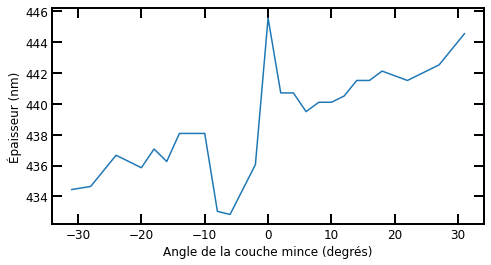

In [85]:
d_45 = plot_epaisseur(45,counts_deux_45, counts_vitre_45)
d_48 = plot_epaisseur(48,counts_deux_48, counts_vitre_48)
d_52 = plot_epaisseur(52,counts_deux_52, counts_vitre_52)
d_56 = plot_epaisseur(56,counts_deux_56, counts_vitre_56)
d_58 = plot_epaisseur(58,counts_deux_58, counts_vitre_58)
d_60 = plot_epaisseur(60,counts_deux_60, counts_vitre_60)
d_62 = plot_epaisseur(62,counts_deux_62, counts_vitre_62)
d_64 = plot_epaisseur(64,counts_deux_64, counts_vitre_64)
d_66 = plot_epaisseur(66,counts_deux_66, counts_vitre_66)
d_68 = plot_epaisseur(68,counts_deux_68, counts_vitre_68)
d_70 = plot_epaisseur(70,counts_deux_70, counts_vitre_70)
d_72 = plot_epaisseur(72,counts_deux_72, counts_vitre_72)
d_74 = plot_epaisseur(74,counts_deux_74, counts_vitre_74)
d_76 = plot_epaisseur(76,counts_deux_76, counts_vitre_76)
d_78 = plot_epaisseur(78,counts_deux_78, counts_vitre_78)
d_80 = plot_epaisseur(80,counts_deux_80, counts_vitre_80)
d_82 = plot_epaisseur(82,counts_deux_82, counts_vitre_82)
d_84 = plot_epaisseur(84,counts_deux_84, counts_vitre_84)
d_86 = plot_epaisseur(86,counts_deux_86, counts_vitre_86)
d_88 = plot_epaisseur(88,counts_deux_88, counts_vitre_88)
d_90 = plot_epaisseur(90,counts_deux_90, counts_vitre_90)
d_92 = plot_epaisseur(92,counts_deux_92, counts_vitre_92)
d_94 = plot_epaisseur(94,counts_deux_94, counts_vitre_94)
d_98 = plot_epaisseur(98,counts_deux_98, counts_vitre_98)
d_103 = plot_epaisseur(103,counts_deux_103, counts_vitre_103)
d_107 = plot_epaisseur(107,counts_deux_103, counts_vitre_103)

d = [d_45,d_48,d_52,d_56,d_58,d_60,d_62,d_64,d_66,d_68,d_70,d_72,d_74,d_76,d_78,d_80,d_82,d_84,d_86,d_88,d_90,d_92,d_94,d_98,d_103,d_107]
angle=[45,48,52,56,58,60,62,64,66,68,70,72,74,76,78,80,82,84,86,88,90,92,94,98,103,107]
zero = np.ones(len(angle))*76
angle-=zero
#d=[431,432,433,434,435,436,436,437,437,433,433,436,437,446,442,442,442,442,442,443,444,444,444,445,447]

beau_graphique()
#plt.figure(11,figsize=(6,3),dpi=100)
plt.xlabel("Angle de la couche mince (degrés)")
plt.ylabel("Épaisseur (nm)")
plt.plot(angle,d)
plt.show()

Le vrai angle 0 est: -6.0


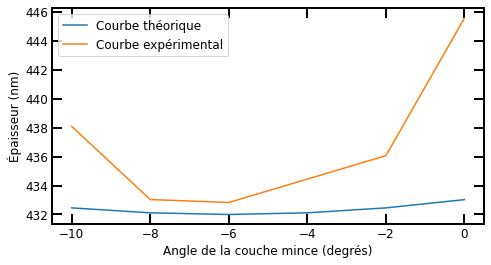

In [125]:
angle_parabole = angle[find_nearest(angle,-10):find_nearest(angle,2)]
d_parabole = d[find_nearest(angle,-10):find_nearest(angle,2)]

i_min, = np.where(d_parabole == np.min(d_parabole))
print("Le vrai angle 0 est:", angle_parabole[i_min[0]])

#Courbe théorique
def snell_descartes(theta_1):
    d0 = 432 #nm
    n_air = 1
    n_verre = 1.52
    theta_2 = np.arcsin(n_air*np.sin(theta_1)/n_verre)
    d = d0/(np.cos(theta_2))
    
    return d
    
x_th_deg = np.linspace(-10,10,100 )

x_th = x_th_deg*(np.pi/180) #degrés à rad

y_th = snell_descartes((angle_parabole+6)*(np.pi/180))
#y_th = snell_descartes((angle+6)*(np.pi/180))



beau_graphique()

plt.plot(angle_parabole,y_th,label = "Courbe théorique")
#plt.plot(angle,y_th,label = "Courbe théorique")
plt.xlabel("Angle de la couche mince (degrés)")
plt.ylabel("Épaisseur (nm)")
plt.plot(angle_parabole,d_parabole, label = "Courbe expérimental")
#plt.plot(angle,d, label = "Courbe expérimental")
plt.legend()
plt.show()

# Méthode manuelle 
angle=[-23,-20,-16,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20,22,24,28,33,38]
d=[431,432,433,434,435,436,436,437,437,433,433,436,437,446,442,442,442,442,442,443,444,444,444,445,447]



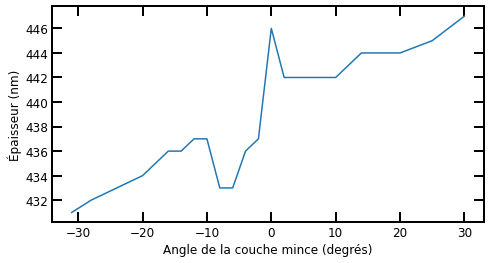

'\n### Exemple de graphique couche mince\nbeau_graphique()\n\ncounts_deux_66_norm = counts_deux_66/counts_vitre_66\ncounts_deux_66_norm /= np.max(counts_deux_66_norm) #Normalisation\n\nplt.plot(lamda_,counts_deux_66_norm)\nplt.xlabel("Longueur d\'onde (nm)")\nplt.ylabel("Transmittance")\nplt.show()\n'

In [108]:
angle=[45,48,52,56,58,60,62,64,66,68,70,72,74,76,78,80,82,84,86,88,90,92,96,101,106]
zero = np.ones(len(angle))*76
angle-=zero
d=[431,432,433,434,435,436,436,437,437,433,433,436,437,446,442,442,442,442,442,443,444,444,444,445,447]

beau_graphique()
#plt.figure(11,figsize=(6,3),dpi=100)
plt.xlabel("Angle de la couche mince (degrés)")
plt.ylabel("Épaisseur (nm)")
plt.plot(angle,d)
plt.show()
"""
### Exemple de graphique couche mince
beau_graphique()

counts_deux_66_norm = counts_deux_66/counts_vitre_66
counts_deux_66_norm /= np.max(counts_deux_66_norm) #Normalisation

plt.plot(lamda_,counts_deux_66_norm)
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Transmittance")
plt.show()
"""

- Tracer des graphiques théoriques de l'intensité en fonction de la longueur d'onde et comparer visuellement avec les spectres experimentaux pour trouver le d approprié (se fier à la periodicité et à la phase, non à l'amplitude). 

- Fitter seulement le deuxième pic de l'or 

- Loi de snell-descartes pour l'analyse de l'angle d'incidence 

- Angle de référence "0°" : 76° +- 0.5°

Bonus

Chlorophylle
H = 0.2288630742903413 +/- 0.008511018616955133, A = 0.7211107230863347 +/- 0.010358596239582787, x0 = 660.8943303237763 +/- 0.4038150575514739, sigma = 31.29157649451344 +/- 0.6174992395841228
Carotène
H = 0.46845788192960747 +/- 0.004714786256111343, A = 0.5096979102505865 +/- 0.005413096931047375, x0 = 506.5879026346311 +/- 0.2491749639278514, sigma = 27.9256484395076 +/- 0.40500971773708005
Paramètres optimisés: Parameters([('amplitude', <Parameter 'amplitude', value=93.88501500601163 +/- 0.168, bounds=[-inf:inf]>), ('center', <Parameter 'center', value=697.5030221282994 +/- 0.0631, bounds=[-inf:inf]>), ('sigma', <Parameter 'sigma', value=72.76097548870526 +/- 0.18, bounds=[0:inf]>), ('gamma', <Parameter 'gamma', value=-8.167843776017579 +/- 0.0973, bounds=[-inf:inf]>)])
Incertitude pic chlorophylle: 1.9068149195971302
Paramètres optimisés: Parameters([('amplitude', <Parameter 'amplitude', value=128.61166556952853 +/- 0.372, bounds=[-inf:inf]>), ('center', <Parameter '

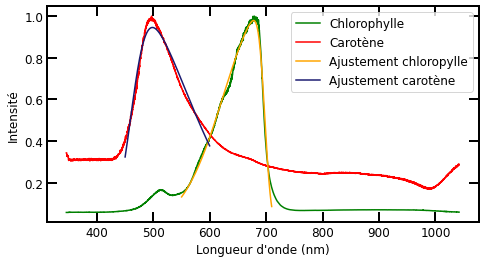

In [46]:
# Calibration pour feuille
with open("Données/vitre_feuille.txt") as vitre_feuille:
    int_time_vitre_feuille = float(list(vitre_feuille)[8].split(":")[1].split("(")[0]) #Temps d'intégration

counts_vitre_feuille /= int_time_vitre_feuille

# Feuille vivante
with open("Données/feuille_vieux_arbre.txt") as feuille_verte:
    int_time_feuille_verte = float(list(feuille_verte)[8].split(":")[1].split("(")[0]) #Temps d'intégration

counts_feuille_verte /= int_time_feuille_verte


counts_feuille_verte_norm = (counts_feuille_verte/counts_vitre_feuille)**(-1)
counts_feuille_verte_norm /= np.max(counts_feuille_verte_norm) #Normalisation


#Feuille morte
with open("Données/feuille_morte_vieux_arbre.txt") as feuille_brune:
    int_time_feuille_brune = float(list(feuille_brune)[8].split(":")[1].split("(")[0]) #Temps d'intégration
    
counts_feuille_brune /= int_time_feuille_brune

counts_feuille_brune_norm = (counts_feuille_brune/counts_vitre_feuille)**(-1)
counts_feuille_brune_norm /= np.max(counts_feuille_brune_norm) #Normalisation


#Feuille verte/feuille brune (pic chlorophylle)
counts_chlorophylle = counts_feuille_verte_norm / counts_feuille_brune_norm
counts_chlorophylle = counts_chlorophylle/np.max(counts_chlorophylle)

beau_graphique()

print("Chlorophylle")
i_gauss_verte_debut, i_gauss_verte_fin = find_nearest(lamda,550), find_nearest(lamda,710)
gauss_verte, p_opt_verte, p_err_verte = fit_gaussien(lamda[i_gauss_verte_debut:i_gauss_verte_fin],counts_chlorophylle[i_gauss_verte_debut:i_gauss_verte_fin], p0 = [0,17,650,3])
plt.plot(lamda, counts_chlorophylle,"g", label = "Chlorophylle")
#plt.plot(lamda[i_gauss_verte_debut:i_gauss_verte_fin],gauss_verte,"m")

#Pic carotène
print("Carotène")
i_gauss_brune_debut, i_gauss_brune_fin = find_nearest(lamda,450), find_nearest(lamda,600)
gauss_brune, p_opt_brune, p_err_brune = fit_gaussien(lamda[i_gauss_brune_debut:i_gauss_brune_fin], counts_feuille_brune_norm[i_gauss_brune_debut:i_gauss_brune_fin], p0 = [0.2,17,500,3])
plt.plot(lamda, counts_feuille_brune_norm,"r", label = "Carotène")
#plt.plot(lamda[i_gauss_brune_debut:i_gauss_brune_fin],gauss_brune,"b")

plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Intensité")
#plt.show()

# Skewed Gaussian fit (chlorophylle)
model = SkewedGaussianModel()
params = model.make_params(amplitude=500, center=650, sigma=7, gamma=1)
result = model.fit(counts_chlorophylle[i_gauss_verte_debut:i_gauss_verte_fin], params, x=lamda[i_gauss_verte_debut:i_gauss_verte_fin])
print("Paramètres optimisés:",result.params)
print("Incertitude pic chlorophylle:",erreur_lambda(697.5030298531121))
plt.plot(lamda[i_gauss_verte_debut:i_gauss_verte_fin], result.best_fit, label = "Ajustement chloropylle", color = "orange")

# Skewed Gaussian fit (chlorophylle)
model = SkewedGaussianModel()
params = model.make_params(amplitude=500, center=500, sigma=7, gamma=1)
result = model.fit(counts_feuille_brune_norm[i_gauss_brune_debut:i_gauss_brune_fin], params, x=lamda[i_gauss_brune_debut:i_gauss_brune_fin])
print("Paramètres optimisés:",result.params)
print("Incertitude pic carotène:",erreur_lambda(460.62119231154884))
plt.plot(lamda[i_gauss_brune_debut:i_gauss_brune_fin], result.best_fit, label = "Ajustement carotène", color = "midnightblue")

plt.legend()
plt.show()